In [2]:
import sys, os

# add project root to Python path
sys.path.append(os.path.abspath(".."))

from src.etl.load_data import load_state_nibrs
import pandas as pd

# Load California FBI data
nibrs_ca = load_state_nibrs("CA")

# Preview the incident table
nibrs_ca["incident"].head()


FileNotFoundError: No folder found for CA-2021

In [8]:
from src.etl.load_data import load_state_nibrs

# Load California NIBRS 2021 data
nibrs_ca = load_state_nibrs("CA", base_path="../raw_data/FBI NIBRS Crime Data 2021")

# Check what tables you have
list(nibrs_ca.keys())[:10]


✅ Loaded nibrs_prop_desc_type with 68 rows for CA
✅ Loaded nibrs_weapon_type with 28 rows for CA
✅ Loaded nibrs_assignment_type with 7 rows for CA
✅ Loaded ref_race with 12 rows for CA
✅ Loaded nibrs_arrest_type with 3 rows for CA
✅ Loaded nibrs_suspected_drug with 14,460 rows for CA
✅ Loaded nibrs_age with 104 rows for CA
✅ Loaded nibrs_injury with 8 rows for CA
✅ Loaded nibrs_arrestee with 39,567 rows for CA
✅ Loaded nibrs_victim_injury with 33,404 rows for CA
✅ Loaded nibrs_prop_loss_type with 8 rows for CA
✅ Loaded nibrs_ethnicity with 5 rows for CA
✅ Loaded nibrs_property_desc with 133,243 rows for CA
✅ Loaded nibrs_justifiable_force with 8 rows for CA
✅ Loaded nibrs_suspected_drug_type with 18 rows for CA
✅ Loaded nibrs_relationship with 27 rows for CA
✅ Loaded nibrs_bias_motivation with 136,848 rows for CA
✅ Loaded agencies with 15 rows for CA
✅ Loaded nibrs_using_list with 4 rows for CA
✅ Loaded nibrs_criminal_act with 28,714 rows for CA


/Users/johnschmidt/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


✅ Loaded nibrs_month with 118,176 rows for CA
✅ Loaded nibrs_offense_type with 86 rows for CA
✅ Loaded nibrs_weapon with 33,683 rows for CA
✅ Loaded nibrs_victim_type with 9 rows for CA
✅ Loaded nibrs_bias_list with 36 rows for CA
✅ Loaded nibrs_incident with 118,176 rows for CA
✅ Loaded nibrs_drug_measure_type with 11 rows for CA
✅ Loaded ref_state with 59 rows for CA
✅ Loaded nibrs_property with 109,667 rows for CA
✅ Loaded nibrs_victim_circumstances with 2 rows for CA
✅ Loaded nibrs_activity_type with 11 rows for CA
✅ Loaded nibrs_circumstances with 17 rows for CA
✅ Loaded nibrs_cleared_except with 6 rows for CA
✅ Loaded nibrs_offense with 136,848 rows for CA
✅ Loaded nibrs_criminal_act_type with 15 rows for CA
✅ Loaded nibrs_offender with 131,342 rows for CA
✅ Loaded nibrs_arrestee_weapon with 39,570 rows for CA
✅ Loaded nibrs_victim_offense with 148,672 rows for CA
✅ Loaded nibrs_victim with 133,987 rows for CA
✅ Loaded nibrs_location_type with 47 rows for CA
✅ Loaded nibrs_suspec

['nibrs_prop_desc_type',
 'nibrs_weapon_type',
 'nibrs_assignment_type',
 'ref_race',
 'nibrs_arrest_type',
 'nibrs_suspected_drug',
 'nibrs_age',
 'nibrs_injury',
 'nibrs_arrestee',
 'nibrs_victim_injury']

In [6]:
import os
print(os.getcwd())


/Users/johnschmidt/crime-etl-portfolio/crime-etl-portfolio/notebooks


In [7]:
!ls

eda.ipynb


In [9]:
import matplotlib.pyplot as plt

# Preview incidents
print(nibrs_ca["nibrs_incident"].head())

# Count incidents by month
incidents = nibrs_ca["nibrs_incident"]
monthly_counts = incidents["INCIDENT_MONTH"].value_counts().sort_index()

plt.figure(figsize=(10,5))
monthly_counts.plot(kind="bar")
plt.title("California NIBRS Incidents by Month (2021)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.show()


   data_year  agency_id  incident_id  nibrs_month_id cargo_theft_flag  \
0       2021       1516    141774651        40314544                f   
1       2021       1516    136500530         3105156                f   
2       2021       1516    136580646         3105156                f   
3       2021       1516    136530548         3105156                f   
4       2021       1516    136516079         3105156                f   

           submission_date incident_date report_date_flag  incident_hour  \
0  2021-09-03 15:14:09.574    2021-08-26                f           12.0   
1  2021-04-01 16:21:26.134    2021-01-01                f            0.0   
2  2021-04-07 16:16:36.326    2021-01-01                f            0.0   
3  2021-04-06 17:20:40.595    2021-01-01                f            1.0   
4   2021-04-03 00:07:12.33    2021-01-01                f            0.0   

   cleared_except_id cleared_except_date incident_status  data_home  \
0                  6             

KeyError: 'INCIDENT_MONTH'

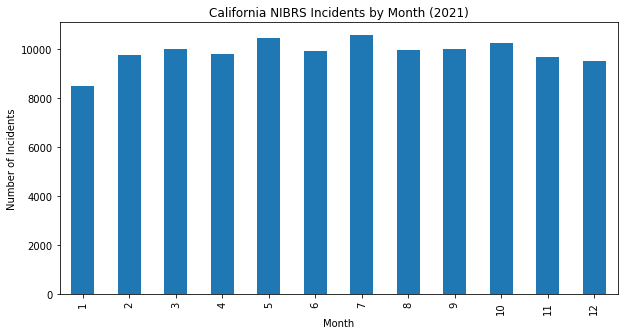

In [10]:
# Make sure incident_date is parsed as datetime
incidents = nibrs_ca["nibrs_incident"].copy()
incidents["incident_date"] = pd.to_datetime(incidents["incident_date"])

# Extract month number
incidents["month"] = incidents["incident_date"].dt.month

# Count by month
monthly_counts = incidents["month"].value_counts().sort_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
monthly_counts.plot(kind="bar")
plt.title("California NIBRS Incidents by Month (2021)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.show()


In [11]:
# 1. confirm we have the offense and offense_type tables
print("available tables:", list(nibrs_ca.keys())[:40])

# quick existence check
for t in ["nibrs_offense", "nibrs_offense_type"]:
    print(t, "in nibrs_ca ->", t in nibrs_ca)


available tables: ['nibrs_prop_desc_type', 'nibrs_weapon_type', 'nibrs_assignment_type', 'ref_race', 'nibrs_arrest_type', 'nibrs_suspected_drug', 'nibrs_age', 'nibrs_injury', 'nibrs_arrestee', 'nibrs_victim_injury', 'nibrs_prop_loss_type', 'nibrs_ethnicity', 'nibrs_property_desc', 'nibrs_justifiable_force', 'nibrs_suspected_drug_type', 'nibrs_relationship', 'nibrs_bias_motivation', 'agencies', 'nibrs_using_list', 'nibrs_criminal_act', 'nibrs_month', 'nibrs_offense_type', 'nibrs_weapon', 'nibrs_victim_type', 'nibrs_bias_list', 'nibrs_incident', 'nibrs_drug_measure_type', 'ref_state', 'nibrs_property', 'nibrs_victim_circumstances', 'nibrs_activity_type', 'nibrs_circumstances', 'nibrs_cleared_except', 'nibrs_offense', 'nibrs_criminal_act_type', 'nibrs_offender', 'nibrs_arrestee_weapon', 'nibrs_victim_offense', 'nibrs_victim', 'nibrs_location_type']
nibrs_offense in nibrs_ca -> True
nibrs_offense_type in nibrs_ca -> True


In [12]:
import pandas as pd

off = nibrs_ca["nibrs_offense"].copy()
off_type = nibrs_ca["nibrs_offense_type"].copy()

# normalize column names to lowercase/underscores
def normalize_cols(df):
    df = df.copy()
    df.columns = (df.columns.str.strip()
                             .str.lower()
                             .str.replace(r"\s+", "_", regex=True))
    return df

off = normalize_cols(off)
off_type = normalize_cols(off_type)

print("offense columns:", off.columns.tolist())
print("offense_type columns:", off_type.columns.tolist())

# show a small sample so you can see the fields
display(off.head())
display(off_type.head())


offense columns: ['data_year', 'offense_id', 'incident_id', 'offense_code', 'attempt_complete_flag', 'location_id', 'num_premises_entered', 'method_entry_code']
offense_type columns: ['offense_code', 'offense_name', 'crime_against', 'ct_flag', 'hc_flag', 'hc_code', 'offense_category_name', 'offense_group']


,data_year,offense_id,incident_id,offense_code,attempt_complete_flag,location_id,num_premises_entered,method_entry_code
0,2021,170403568,141774651,11A,C,35,NaN,NaN
1,2021,164352006,136500530,13A,C,25,NaN,NaN
2,2021,164444800,136580646,13B,C,35,NaN,NaN
3,2021,164387076,136530548,13B,C,98,NaN,NaN
4,2021,164370837,136516079,13B,C,14,NaN,NaN


,offense_code,offense_name,crime_against,ct_flag,hc_flag,hc_code,offense_category_name,offense_group
0,09A,Murder and Nonnegligent Manslaughter,Person,f,t,01,Homicide Offenses,A
1,09B,Negligent Manslaughter,Person,f,t,,Homicide Offenses,A
2,09C,Justifiable Homicide,Person,f,f,,Homicide Offenses,A
3,11A,Rape,Person,f,t,02,Sex Offenses,A
4,11B,Sodomy,Person,f,t,02,Sex Offenses,A


In [13]:
# Try a list of likely join pairs (left_col, right_col)
candidates = [
    ("offense_type_id", "offense_type_id"),
    ("offense_type", "offense_type"),
    ("offense_code", "offense_code"),
    ("offense_code_id", "offense_code_id"),
    ("offense_id", "offense_id"),
    ("offense_sequence", "offense_sequence"),
]

join_pair = None
for lcol, rcol in candidates:
    if lcol in off.columns and rcol in off_type.columns:
        join_pair = (lcol, rcol)
        break

print("chosen join pair:", join_pair)
if join_pair is None:
    # fallback: look for any common column names
    common = set(off.columns) & set(off_type.columns)
    print("no candidate matched; common cols:", common)


chosen join pair: ('offense_code', 'offense_code')


In [14]:
if join_pair is None:
    raise RuntimeError("No join key found automatically. Check offense/offense_type columns.")

left_key, right_key = join_pair
off_merged = off.merge(off_type, left_on=left_key, right_on=right_key, how="left", suffixes=("", "_type"))

print("merged columns (sample):", off_merged.columns.tolist()[:40])
display(off_merged[[left_key, right_key]].head())


merged columns (sample): ['data_year', 'offense_id', 'incident_id', 'offense_code', 'attempt_complete_flag', 'location_id', 'num_premises_entered', 'method_entry_code', 'offense_name', 'crime_against', 'ct_flag', 'hc_flag', 'hc_code', 'offense_category_name', 'offense_group']


,offense_code,offense_code
0,11A,11A
1,13A,13A
2,13B,13B
3,13B,13B
4,13B,13B


In [15]:
# find candidate label columns (prefer descriptive, human-readable fields)
candidates_label = [c for c in off_merged.columns 
                    if any(k in c for k in ("desc","description","name","type","label"))]

print("possible label columns:", candidates_label)

# heuristic: prefer 'offense_type_description' or similar, else first candidate, else fallback to an offense code column
label_col = None
preferred_order = ["offense_type_description", "offense_type_desc", "offense_name", "offense_description",
                   "offense_type", "offense_desc", "offense_code_desc", "offense_code"]
for p in preferred_order:
    if p in off_merged.columns:
        label_col = p
        break

if label_col is None and candidates_label:
    label_col = candidates_label[0]

if label_col is None:
    # fallback to any column that looks like a code
    for c in ["offense_code", "offense_id", "offense_code_id"]:
        if c in off_merged.columns:
            label_col = c
            break

print("chosen label column:", label_col)
display(off_merged[[label_col]].head())


possible label columns: ['offense_name', 'offense_category_name']
chosen label column: offense_name


,offense_name
0,Rape
1,Aggravated Assault
2,Simple Assault
3,Simple Assault
4,Simple Assault


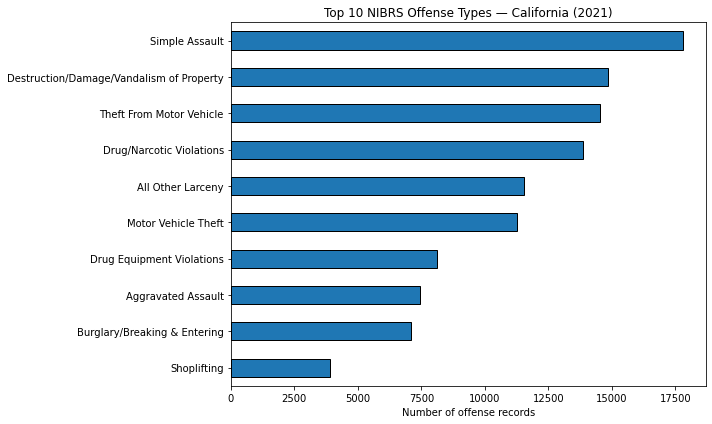

,count,pct
Simple Assault,17800,16.12
Destruction/Damage/Vandalism of Property,14837,13.44
Theft From Motor Vehicle,14521,13.15
Drug/Narcotic Violations,13868,12.56
All Other Larceny,11535,10.45
Motor Vehicle Theft,11272,10.21
Drug Equipment Violations,8126,7.36
Aggravated Assault,7456,6.75
Burglary/Breaking & Entering,7103,6.43
Shoplifting,3887,3.52


In [22]:
import matplotlib.pyplot as plt

# create a cleaned label column (fill missing gracefully)
off_merged["offense_label"] = off_merged[label_col].fillna("UNKNOWN").astype(str)

# aggregate counts
top10 = off_merged["offense_label"].value_counts().nlargest(10)
top10_pct = (top10 / top10.sum()) * 100

# make a horizontal bar chart sorted top->bottom
plt.figure(figsize=(10,6))
top10.sort_values().plot(kind="barh", edgecolor="k")
plt.title("Top 10 NIBRS Offense Types — California (2021)")
plt.xlabel("Number of offense records")
plt.tight_layout()
plt.show()

# also show a table with counts + percent
top10_table = pd.DataFrame({"count": top10, "pct": top10_pct.round(2)})
top10_table


In [26]:
import matplotlib.pyplot as plt

# Pull the offense + offense_type tables
offenses = nibrs_ca["nibrs_offense"]
offense_types = nibrs_ca["nibrs_offense_type"]

# Merge to get human-readable names
offenses = offenses.merge(offense_types, on="offense_type_id", how="left")

# Count incidents per offense type
offense_counts = offenses.groupby("offense_name").size().sort_values(ascending=False)
top10 = offense_counts.head(10)

# Plot top 10
fig, ax = plt.subplots(figsize=(10, 6))
top10.plot(kind="barh", ax=ax, color="steelblue")
ax.set_title("Top 10 Most Common Offense Types in CA (2021)")
ax.set_xlabel("Number of Incidents")
ax.invert_yaxis()

# Save figure
import os
os.makedirs("figures", exist_ok=True)
fig.savefig("figures/top10_offense_types_ca_2021.png", dpi=300, bbox_inches="tight")
plt.show()


KeyError: 'offense_type_id'

In [27]:
nibrs_ca["nibrs_offense"].columns


Index(['data_year', 'offense_id', 'incident_id', 'offense_code',
       'attempt_complete_flag', 'location_id', 'num_premises_entered',
       'method_entry_code'],
      dtype='object')

In [28]:
nibrs_ca["nibrs_offense_type"].columns


Index(['offense_code', 'offense_name', 'crime_against', 'ct_flag', 'hc_flag',
       'hc_code', 'offense_category_name', 'offense_group'],
      dtype='object')

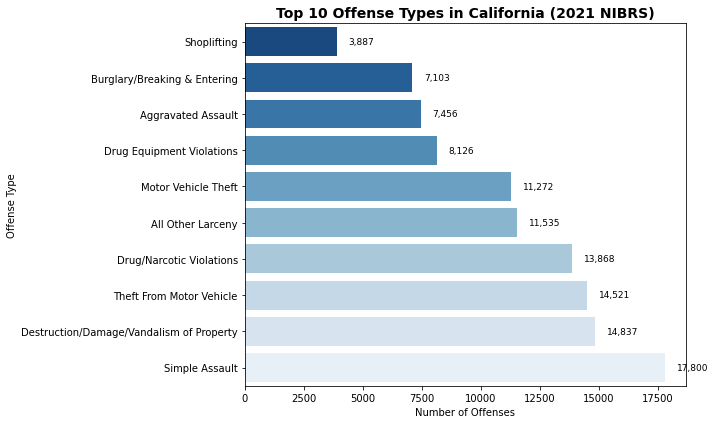

In [30]:
import seaborn as sns

# Sort descending for horizontal bar plot
top10_sorted = top10.sort_values(ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top10_sorted.values,
    y=top10_sorted.index,
    palette="Blues_r"
)

# Titles and labels
plt.title("Top 10 Offense Types in California (2021 NIBRS)", fontsize=14, weight="bold")
plt.xlabel("Number of Offenses")
plt.ylabel("Offense Type")

# Add value labels at the end of each bar
for i, v in enumerate(top10_sorted.values):
    plt.text(v + 500, i, f"{v:,}", va="center", fontsize=9)

plt.tight_layout()

# Save high-res version
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/top10_offense_types_ca_2021.png", dpi=300, bbox_inches="tight")
plt.show()


## Most Common Crimes in California (2021 NIBRS)

The chart highlights the **top 10 offense types** reported in California during 2021.  
We see that **Simple Assault** was the most frequent offense, with nearly **18,000 reported incidents**. This was followed by **Property Damage/Vandalism** (~14,800 cases) and **Theft from Motor Vehicles** (~14,500 cases).  

A few key insights stand out:  
- **Violent vs. property crimes:** While assaults are highly prevalent, property-related offenses (theft, burglary, vandalism) make up a significant portion of the top 10.  
- **Drug-related offenses:** Both *Drug/Narcotic Violations* (~13,900) and *Drug Equipment Violations* (~8,100) appear prominently, underscoring enforcement trends and the continued impact of drug-related activity.  
- **Targeted property crimes:** Motor vehicle theft (~11,300) and shoplifting (~3,900) suggest recurring issues around specific property categories.  

➡️ **Key takeaway:** Crime in California is driven by a mix of **interpersonal violence (assaults)** and **property-related offenses**, with drug activity also playing a central role. This distribution provides a strong baseline for deeper geospatial mapping and hotspot analysis.


In [31]:
print(top10)

offense_name
Simple Assault                              17800
Destruction/Damage/Vandalism of Property    14837
Theft From Motor Vehicle                    14521
Drug/Narcotic Violations                    13868
All Other Larceny                           11535
Motor Vehicle Theft                         11272
Drug Equipment Violations                    8126
Aggravated Assault                           7456
Burglary/Breaking & Entering                 7103
Shoplifting                                  3887
dtype: int64
